In [1]:
# Version: 0.3
# Date: 24 Oct 2023
# Author: Sathish Balachandran

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# obtaining user inputs for the range and width of x values
xmin = float(input("Enter minimum value (integer) for the range of x values: "))
xmax = float(input("Enter maximum value (integer) for the range of x values: "))
rangewidth = int(input("Enter the number (integer) of data to be considered: "))

Enter minimum value (integer) for the range of x values: 0
Enter maximum value (integer) for the range of x values: 100
Enter the number (integer) of data to be considered: 200


In [4]:
# calculating x values
np.random.seed(0)
x1 = np.linspace(xmin, xmax, rangewidth)

In [5]:
# obtaining slope and intercept for the actual classifier
m = float(input("Enter the slope value for the actual classifier: "))
c = float(input("Enter the intercept value for the actual classifier: "))

Enter the slope value for the actual classifier: 4
Enter the intercept value for the actual classifier: 5


In [6]:
# calculating actual and distributed y values
x2_true = m * x1 + c
x2 = x2_true + np.random.normal(0, 100, len(x1))

In [7]:
# classifier based on sample hyperplane (here it is line)
y = np.sign(x2 - x2_true)
x11, x12, x13, x21, x22, x23 = [], [], [], [], [], []

# seperating the data based on classifier
for i in range(len(x1)):
    if x2[i] > x2_true[i]:
        x11.append(x1[i])
        x21.append(x2[i])
    elif x2[i] == x2_true[i]:
        x12.append(x1[i])
        x22.append(x2[i])
    elif x2[i] < x2_true[i]:
        x13.append(x1[i])
        x23.append(x2[i])

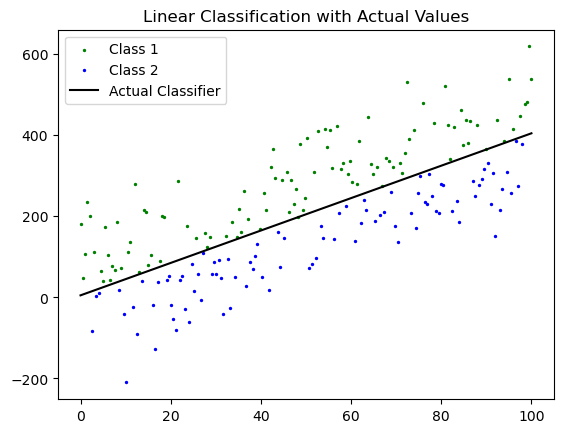

In [8]:
# plotting the original values
plt.figure()
if len(x11) > 0:
    plt.scatter(x11, x21, color='green', s=2, label='Class 1')
if len(x12) > 0:
    plt.scatter(x12, x22, color='magenta', s=2, label='Class 3')
if len(x13) > 0:
    plt.scatter(x13, x23, color='blue', s=2, label='Class 2')
plt.plot(x1, x2_true, color='black', label='Actual Classifier')
plt.title('Linear Classification with Actual Values')
plt.legend()
plt.show()

In [9]:
def loss_calc(x1, x2, y, th, th0):
    """function to calculate the training error rate from the losses
       based on hyperplane parameters - theta and thetazero
    """
    loss_val = 0
    y_loss = []
    for i in range(len(x1)):
        # # classifier based on prediction based on theta and thetazero
        y_loss.append(1 if y[i] * ((th[0] * x1[i]) + (th[1] * x2[i]) + th0) <= 0 else 0)
    
    # returns training error rate
    return sum(y_loss)/len(x1)

In [10]:
def random_linear_classifier(x1, x2, y, k):
    """Random numbers are used to find theta and theta zero
       which are used to find the prediction for classification
    """
    theta, thetazero, errorrate = [], [], []
    for j in range(k):
        # generate random values for theta and thetazero
        theta_temp = np.random.uniform(-100, 100, 2)
        thetazero_temp = np.random.uniform(-100, 100)
        
        # keep track of the parameters and calculated training error rate
        theta.append(theta_temp)
        thetazero.append(thetazero_temp)
        errorrate.append(loss_calc(x1, x2, y, theta_temp, thetazero_temp))
    
    # finding the minimum error rate and its index
    error_min = min(errorrate)
    min_index = errorrate.index(error_min)
    
    # return corresponding theta and thetazero for the minimum error rate
    return theta[min_index], thetazero[min_index], error_min

In [11]:
# calculating parameters for a fixed hyper parameter (last argument)
theta, thetazero, loss_min = random_linear_classifier(x1, x2, y, 100)

In [12]:
# predicted y based on linear parameters
x2_pred = (-theta[0] * x1 - thetazero) / theta[1]

In [13]:
# seperate data based on predicted classifier
x14, x15, x16, x24, x25, x26 = [], [], [], [], [], []
for i in range(len(x1)):
    if x2[i] > x2_pred[i]:
        x14.append(x1[i])
        x24.append(x2[i])
    elif x2[i] == x2_pred[i]:
        x15.append(x1[i])
        x25.append(x2[i])
    elif x2[i] < x2_pred[i]:
        x16.append(x1[i])
        x26.append(x2[i])

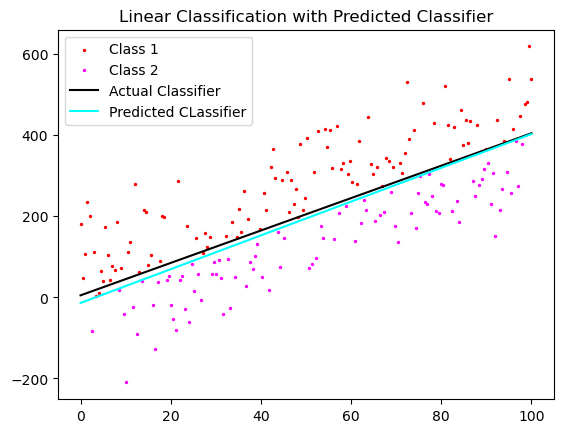

In [14]:
# plotting the original values along with predicted classifier
plt.figure()
if len(x14) > 0:
    plt.scatter(x14, x24, color='red', s=2, label='Class 1')
if len(x15) > 0:
    plt.scatter(x15, x25, color='green', s=2, label='Class 3')
if len(x16) > 0:
    plt.scatter(x16, x26, color='magenta', s=2, label='Class 2')
plt.plot(x1, x2_true, color='black', label='Actual Classifier')
plt.plot(x1, x2_pred, color='cyan', label='Predicted CLassifier')
plt.title('Linear Classification with Predicted Classifier')
plt.legend()
plt.show()

In [16]:
# calculating the error rate for n times
errors = []
k = np.arange(1, 501)
for i in k:
    theta, thetazero, error_min = random_linear_classifier(x1, x2, y, i)
    errors.append(error_min)

KeyboardInterrupt: 

In [ ]:
# plotting the minimum error rates against hyperparameter
plt.figure()
plt.plot(k ,errors, label='Error rate')
plt.title('Learning Curve - Error rate against hyperparameter')
plt.legend()
plt.show()